In [ ]:
!pip install pmdarima
!pip install shap
!pip install --upgrade mxnet~=1.7 gluonts
!pip install python-utils
!pip install plotly==4.1.0
!pip install -U scikit-learn

     |████████████████████████████████| 1.5MB 8.0MB/s 
     |████████████████████████████████| 9.5MB 14.1MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 358kB 6.8MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491627 sha256=ade8b0887f5127961f90e21523cab62b968164fedec83af291cd2a2a40a094e4
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap
     |████████████████████████████████| 46.9MB 89kB/s 
     |████████████████████████████████| 901kB 34.0MB/s 
     |████████████████████████████████| 10.1MB 33.0MB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 7.1MB 7.4MB/s 
ERROR: cufflinks 0.17.3 has requirement plotly>=4.1.1, b

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
import datetime
warnings.filterwarnings("ignore")
np.random.seed(32)

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/dataset/country_vaccinations.csv')
data2=pd.read_csv('/content/drive/MyDrive/dataset/covid-19-main/data/countries-aggregated.csv')

In [ ]:
data.head()

country  ...                                     source_website
0  Afghanistan  ...  https://reliefweb.int/report/afghanistan/afgha...
1  Afghanistan  ...  https://reliefweb.int/report/afghanistan/afgha...
2  Afghanistan  ...  https://reliefweb.int/report/afghanistan/afgha...
3  Afghanistan  ...  https://reliefweb.int/report/afghanistan/afgha...
4  Afghanistan  ...  https://reliefweb.int/report/afghanistan/afgha...

[5 rows x 15 columns]

In [ ]:
data.dropna(subset=['daily_vaccinations'],inplace=True)
s=data['date'].str.split('-',expand=True)
data['Year']=s[0]
data['Month']=s[1]
data['Date']=s[2]
fig1=px.scatter_geo(data,color='vaccines',locationmode="ISO-3",locations="iso_code",opacity=0.6,
                     hover_name="iso_code", size="daily_vaccinations",projection='conic equal area',animation_group ="iso_code",color_continuous_scale='blackbody',
                     animation_frame="Date",scope='world',template="plotly_dark",title='Vaccination Count Over The World Over Time' )
fig1.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 400

fig1.update_geos(
    landcolor="white",
    oceancolor="#006994",
    showocean=True,
    lakecolor="LightBlue"
)

fig1.update_traces(
    marker_coloraxis=None
)
fig1.show()

In [ ]:
arr=[]
index1=data.groupby(['country','date']).count().index
index2=data2.groupby(['Country','Date']).count().index
for i in index2:
    if i in index1:
        arr.append(1)
    else:
        arr.append(0)
data2['Vaccine_is_there']=arr
data2.head()

Date      Country  Confirmed  Recovered  Deaths  Vaccine_is_there
0  2020-01-22  Afghanistan          0          0       0                 0
1  2020-01-23  Afghanistan          0          0       0                 0
2  2020-01-24  Afghanistan          0          0       0                 0
3  2020-01-25  Afghanistan          0          0       0                 0
4  2020-01-26  Afghanistan          0          0       0                 0

In [ ]:
t=data2.groupby(['Country']).sum()
cons=t[t['Vaccine_is_there']==0].index
dan=data2[~data2['Country'].isin(cons)]

In [ ]:
len(data2['Country'].unique())

192

In [ ]:
data2['Date']=pd.to_datetime(data2['Date'])
dfs=list(data2.groupby("Country"))
first_title = dfs[0][0]+' '*30 +'1 here represents :2399'
traces = []
buttons = []
for i,d in enumerate(dfs):
    visible=[False]*len(dfs)
    visible[i]=True
    name=d[0]
    scale=MinMaxScaler()
    yp=scale.fit_transform(d[1][['Deaths']])
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=d[1]['Date'],y=[i[0] for i in yp]))
    mm=max(d[1]['Deaths'])
    traces.append(
    fig.update_traces(visible=True if i==0 else False).data[0])
    buttons.append(dict(label=name,
                        method="update",
                        args=[{"visible":visible},
                              {"title":str(name)+' '*30+'1 here represents :'+str(mm)}]))

updatemenus = [{'active':0, "buttons":buttons}]
shapes=[({'type': 'line',
               'xref': 'x',
               'yref': 'y',
               'x0': '2020-12-20' ,
               'y0': 0,
               'x1': '2020-12-20',
               'y1': 1})]
fig = go.Figure(data=traces,
                 layout=dict(updatemenus=updatemenus,shapes=shapes,template='plotly_dark'))
fig.update_layout(title=first_title, title_x=0.5)
fig.show()

In [ ]:
datan=data[['country','iso_code','date','total_vaccinations_per_hundred','daily_vaccinations']]
datan.sort_values('date',inplace=True)
datan.dropna(inplace=True)
fig = px.scatter(datan, x="total_vaccinations_per_hundred", y='daily_vaccinations', animation_frame="date", animation_group="iso_code",
           hover_name="iso_code", text='iso_code',range_x=[-10,100], range_y=[-100000,1500000])

fig.update_traces(marker=dict(size=32,  color='DarkSlateGrey'))
fig.update_layout(template='plotly_dark')
fig.show()

In [ ]:
# We are gonna use keras model with LSTM here to do some predictions :)
# name=input('Please enter the country name for the time series analysis :')
datacd=data[data['vaccines']=='Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac']
datacd.tail(20)

country iso_code        date  ...  Year  Month  Date
2926   China      CHN  2021-04-17  ...  2021     04    17
2927   China      CHN  2021-04-18  ...  2021     04    18
2928   China      CHN  2021-04-19  ...  2021     04    19
2929   China      CHN  2021-04-20  ...  2021     04    20
2930   China      CHN  2021-04-21  ...  2021     04    21
2931   China      CHN  2021-04-22  ...  2021     04    22
2932   China      CHN  2021-04-23  ...  2021     04    23
2933   China      CHN  2021-04-24  ...  2021     04    24
2934   China      CHN  2021-04-25  ...  2021     04    25
2935   China      CHN  2021-04-26  ...  2021     04    26
2936   China      CHN  2021-04-27  ...  2021     04    27
2937   China      CHN  2021-04-28  ...  2021     04    28
2938   China      CHN  2021-04-29  ...  2021     04    29
2939   China      CHN  2021-04-30  ...  2021     04    30
2940   China      CHN  2021-05-01  ...  2021     05    01
2941   China      CHN  2021-05-02  ...  2021     05    02
2942   China      CHN  2021-05-03  ...  2021     05    03
2943   China      CHN  2021-05-04  ...  2021     05    04
2944   China      CHN  2021-05-05  ...  2021     05    05
2945   China      CHN  2021-05-06  ...  2021     05    06

[20 rows x 18 columns]

In [ ]:
datacd.sort_values('date',inplace=True)
lp='daily_vaccinations_per_million'
datacd.dropna(subset=[lp],inplace=True)
datac=datacd[[lp]]
datac.tail(10)

daily_vaccinations_per_million
2936                          3675.0
2937                          3942.0
2938                          4192.0
2939                          4861.0
2940                          4972.0
2941                          5006.0
2942                          5004.0
2943                          4826.0
2944                          4538.0
2945                          4394.0

In [ ]:
# Using simple LSTM code to do some time series predictions :)

datacd.sort_values('date',inplace=True)
lp='total_vaccinations_per_hundred'
datacd.dropna(subset=[lp],inplace=True)
datac=datacd[[lp]]
dates=datacd['date'].values
train,test=train_test_split(datac,test_size=0.2,shuffle=False)
def create_test_train(dataset,look_back=1):
    x=dataset.values[0:len(dataset)-look_back]
    y=dataset.values[look_back:len(dataset)]
    return x,y
look_back = 2
trainX, trainY = create_test_train(train, look_back)
testX, testY = create_test_train(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Making the model
model = Sequential()
model.add(LSTM(1000, input_shape=(1, 1)))
model.add(Dense(1000))
model.add(Dense(100))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
fitted_model=model.fit(trainX, trainY, epochs=100, batch_size=8, verbose=2,validation_data=(testX,testY))

Epoch 1/100
6/6 - 18s - loss: 31.9297 - val_loss: 51.8905
Epoch 2/100
6/6 - 0s - loss: 6.6858 - val_loss: 31.9367
Epoch 3/100
6/6 - 0s - loss: 2.4429 - val_loss: 9.0591
Epoch 4/100
6/6 - 0s - loss: 2.1443 - val_loss: 13.0873
Epoch 5/100
6/6 - 0s - loss: 1.8570 - val_loss: 0.1029
Epoch 6/100
6/6 - 0s - loss: 0.8099 - val_loss: 1.4990
Epoch 7/100
6/6 - 0s - loss: 0.5059 - val_loss: 2.2247
Epoch 8/100
6/6 - 0s - loss: 0.2471 - val_loss: 0.3631
Epoch 9/100
6/6 - 0s - loss: 0.2379 - val_loss: 2.5331
Epoch 10/100
6/6 - 0s - loss: 0.1683 - val_loss: 0.3286
Epoch 11/100
6/6 - 0s - loss: 0.1648 - val_loss: 2.8661
Epoch 12/100
6/6 - 0s - loss: 0.1440 - val_loss: 0.5799
Epoch 13/100
6/6 - 0s - loss: 0.1383 - val_loss: 2.2795
Epoch 14/100
6/6 - 0s - loss: 0.1224 - val_loss: 1.2716
Epoch 15/100
6/6 - 0s - loss: 0.1245 - val_loss: 2.0980
Epoch 16/100
6/6 - 0s - loss: 0.1103 - val_loss: 1.0610
Epoch 17/100
6/6 - 0s - loss: 0.1274 - val_loss: 1.9806
Epoch 18/100
6/6 - 0s - loss: 0.1105 - val_loss: 1.3

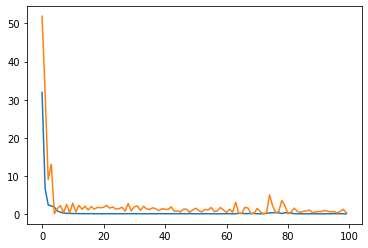

In [ ]:
# Plotting the loss of the model
plt.plot(fitted_model.history['loss'])
plt.plot(fitted_model.history['val_loss'])

In [ ]:
# make predictions
trainPredict = fitted_model.model.predict(trainX)
testPredict = fitted_model.model.predict(testX)
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=datacd['date'][:len(trainPredict)],y=trainX.flatten(), name="Original data"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=datacd['date'][:len(trainPredict)],y=trainPredict.flatten(), name="Predicted data"),
    secondary_y=True,
)
fig.update_layout(template='plotly_dark')
fig.show()

In [ ]:
# Let's predict for 10 days more :)
n=100
date_n=datacd[len(trainPredict)-1:len(trainPredict)+n+1]['date']
l=[]
t=trainX[-1]
for i in range(n):  
    pred=fitted_model.model.predict(t.reshape(1,1,1))
    l.append(pred)
    t=pred
l=[i[0][0] for i in l]

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=datacd['date'][:len(trainPredict)],y=trainX.flatten(), name="Original data"),
    secondary_y=False,
)

fig.add_trace(go.Scatter(x=date_n,y=l,name='Forecast'),secondary_y=False)

fig.update_layout(template='plotly_dark')
fig.show()

In [ ]:
# invert predictions
trainPredict = scale.inverse_transform(trainPredict)
trainY = scale.inverse_transform(trainY)
testPredict = scale.inverse_transform(testPredict)
testY = scale.inverse_transform(testY)

In [ ]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print(trainY[0])
print(trainPredict[:,0])
print('Train Score: %.0f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))
print(testY[0])
print(testPredict[:,0])
print('Test Score: %.0f RMSE' % (testScore))

[1091.58]
[ 1909.3628  2402.8157  2495.4778  3036.8513  3874.7656  4014.7107
  4793.572   5809.2686  7110.514   8462.53    9564.791  10163.519
 10431.408  10762.335  11361.108  12022.709  12573.758  13030.07
 13501.795  13910.3125 14459.71   15212.018  15994.008  16306.2705
 16649.379  16960.924  17303.2    17645.008  18296.176  18929.975
 19300.068  19607.94   20099.477  20482.541  20864.75   21322.219
 21732.809  21990.754  22233.121  22535.502  22942.688  23498.7
 24231.385 ]
Train Score: 507 RMSE
[25928.98]
[25639.348 26095.033 26753.084 27566.14  28515.76  29667.955 30189.252
 30665.438 31111.1   31554.277]
Test Score: 935 RMSE


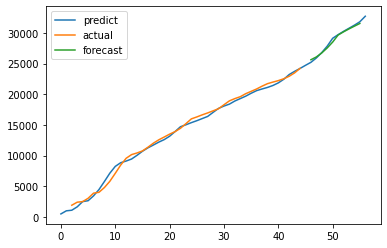

In [ ]:
trainPredictPlot = np.empty_like(datac)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(datac)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back)+1:len(datac)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scale.inverse_transform(datac), label='predict')
plt.plot(trainPredictPlot, label='actual')
plt.plot(testPredictPlot, label='forecast')
plt.legend()
plt.show()

In [ ]:
mean_squared_error(trainY[:,0], trainPredict[:,0])

256900.2749197092

In [ ]:
trainPredict[:,0].mean()

14182.099

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(trainY[:,0], trainPredict[:,0])

0.06664737497824648

In [ ]:
from sklearn.metrics import r2_score
r2_score(trainY[:,0], trainPredict[:,0])

0.9940599611369778

In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(trainY[:,0], trainPredict[:,0]))

419.51095430596007


In [ ]:
from sklearn.metrics import median_absolute_error
print(median_absolute_error(trainY[:,0], trainPredict[:,0]))

385.7082031250011


In [ ]:
from math import sqrt
rmse = sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print(rmse)

506.85330710148196
